In [4]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

In [5]:
model = torchvision.models.detection.ssd300_vgg16(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to /root/.cache/torch/hub/checkpoints/ssd300_vgg16_coco-b556d3b4.pth
100%|██████████| 136M/136M [00:01<00:00, 110MB/s]


In [6]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [7]:
!wget 'http://images.cocodataset.org/val2017/000000037777.jpg'

--2024-12-10 10:10:43--  http://images.cocodataset.org/val2017/000000037777.jpg
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.199.9, 16.182.39.97, 52.216.217.137, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.199.9|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40833 (40K) [image/jpeg]
Saving to: ‘000000037777.jpg’

000000037777.jpg    100%[===================>]  39.88K  --.-KB/s    in 0.03s   

2024-12-10 10:10:43 (1.50 MB/s) - ‘000000037777.jpg’ saved [40833/40833]



In [20]:
ig1 = Image.open("/content/test1.jpg")
ig2 = Image.open("/content/test2.jpg")
ig3 = Image.open("/content/test3.jpg")

In [21]:
transform = T.ToTensor()
img1 = transform(ig1)
img2 = transform(ig2)
img3 = transform(ig3)

In [22]:
with torch.no_grad():
  pred1 = model([img1])
  pred2 = model([img2])
  pred3 = model([img3])

In [23]:
bboxes1, scores1, labels1 = pred1[0]["boxes"], pred1[0]["scores"], pred1[0]["labels"]
bboxes2, scores2, labels2 = pred2[0]["boxes"], pred2[0]["scores"], pred2[0]["labels"]
bboxes3, scores3, labels3 = pred3[0]["boxes"], pred3[0]["scores"], pred3[0]["labels"]

In [24]:
num1 = torch.argwhere(scores1 > 0.5).shape[0]
num2 = torch.argwhere(scores2 > 0.5).shape[0]
num3 = torch.argwhere(scores3 > 0.5).shape[0]

In [25]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [26]:
font = cv2.FONT_HERSHEY_SIMPLEX

In [27]:
igg1 = cv2.imread("/content/test1.jpg")
igg2 = cv2.imread("/content/test2.jpg")
igg3 = cv2.imread("/content/test3.jpg")
for i in range(num1):
  x1, y1, x2, y2 = bboxes1[i].numpy().astype("int")
  igg1 = cv2.rectangle(igg1, (x1, y1), (x2, y2), (0,255,0), 1)
  class_name = coco_names[labels1.numpy()[i]-1]
  igg1 = cv2.putText(igg1, class_name, (x1, y1-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)

for i in range(num2):
  x1, y1, x2, y2 = bboxes2[i].numpy().astype("int")
  igg2 = cv2.rectangle(igg2, (x1, y1), (x2, y2), (0,255,0), 1)
  class_name = coco_names[labels2.numpy()[i]-1]
  igg2 = cv2.putText(igg2, class_name, (x1, y1-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)

for i in range(num3):
  x1, y1, x2, y2 = bboxes3[i].numpy().astype("int")
  igg3 = cv2.rectangle(igg3, (x1, y1), (x2, y2), (0,255,0), 1)
  class_name = coco_names[labels3.numpy()[i]-1]
  igg3 = cv2.putText(igg3, class_name, (x1, y1-10), font, 0.5, (255,0,0), 1, cv2.LINE_AA)

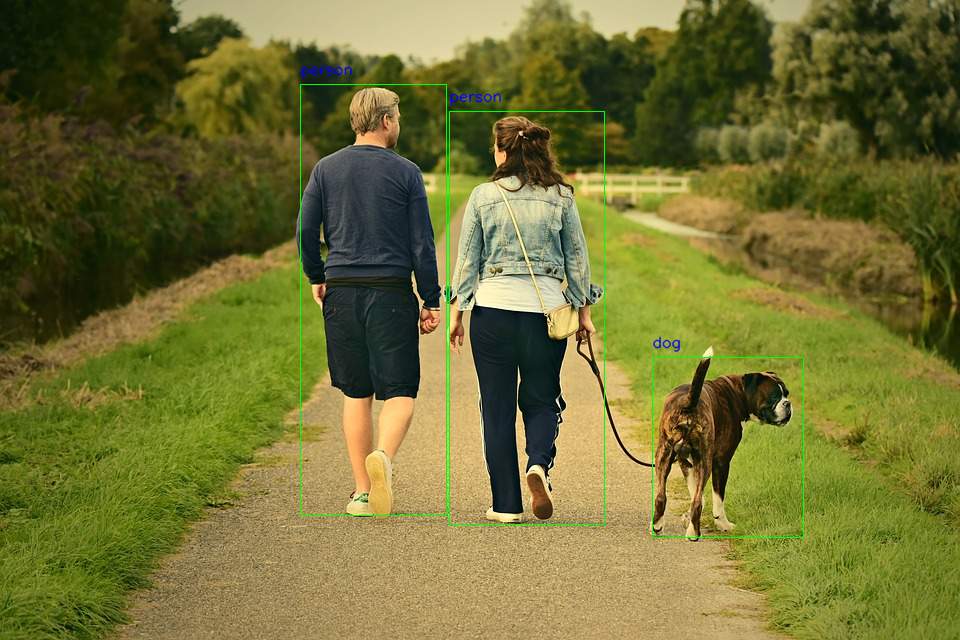

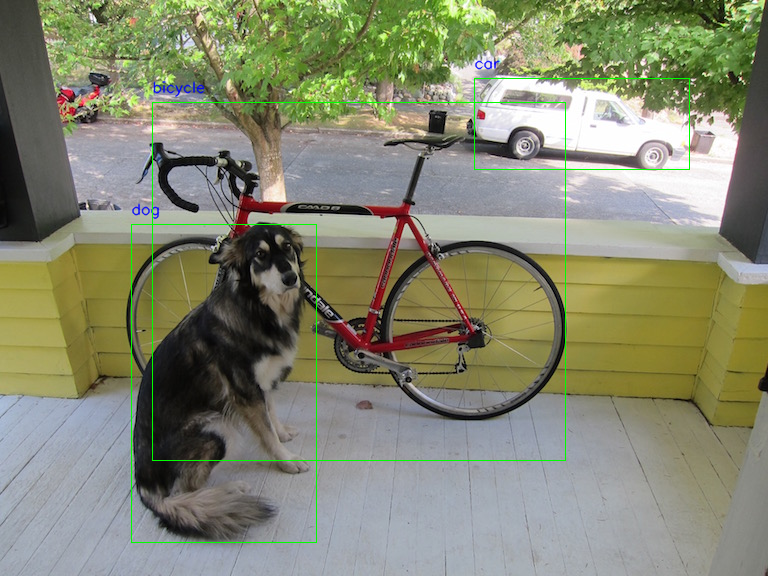

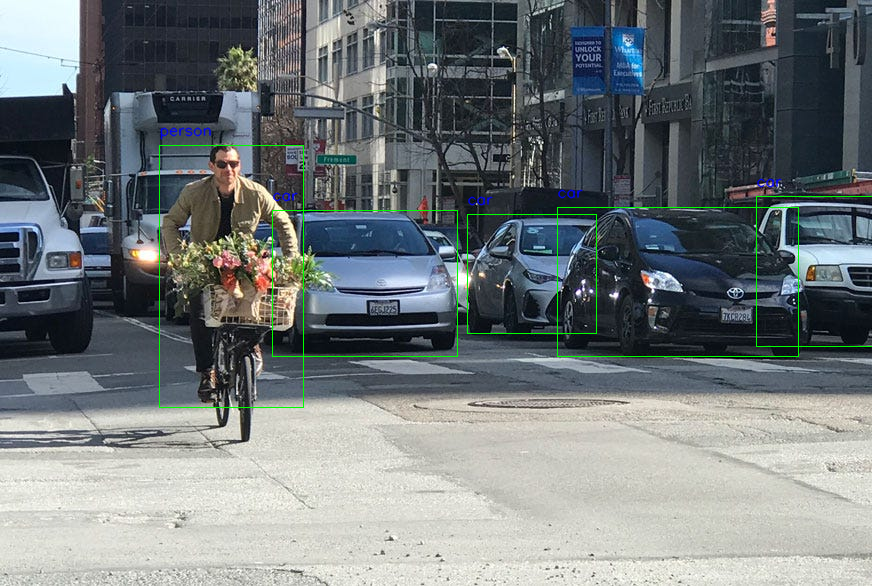

In [28]:
cv2_imshow(igg1)
cv2_imshow(igg2)
cv2_imshow(igg3)